# AMPEROMETRO

OBIETTIVO: stima della resistenza interna dell'amperometro

usando resistenze dell'ordine dei Ω misuriamo la corrente di una resistenza equivalente data da $R_{eq} = R_a + R$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

NOTA: a disposizione avevamo solo a disposizione resistenze con valori interi da 1 a 10 Ω

In [3]:
dir_path = os.path.abspath('')
FILE = dir_path + '/data/' + 'amperometro.csv'
fr = pd.read_csv(FILE)

R = np.array(fr['R(OHM)']) # ohm
V = np.array(fr['V']) # volt
I = np.array(fr['I(mA)']) * (10**(-3)) # milli ampere

In [4]:
def final_val(x,sigma,decimals = 2,exp = 0, udm: str = '') -> str:
    x = np.round(x*np.power(10.0,-exp),decimals)
    sigma = np.round(sigma*np.power(10.0,-exp),decimals)
    return f'{x} ± {sigma} {udm}' if exp == 0 else f'({x} ± {sigma})e{exp} {udm}'

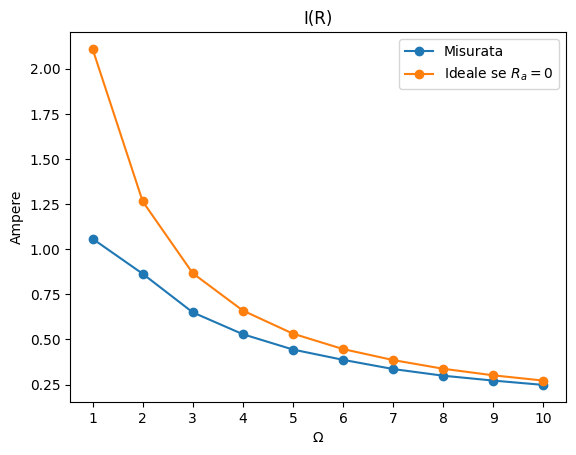

In [18]:
plt.title("I(R)")
plt.plot(R,I,marker='o', label='Misurata')
plt.plot(R,V/R,marker='o', label='Ideale se $R_a = 0$')
plt.xlabel('Ω')
plt.ylabel('Ampere')
plt.xticks(R)
plt.legend()
plt.show()

### Calcolo $R_a$

$
V=R_{eq}I \Rightarrow V = (R_a + R)I \Rightarrow R_a = \frac{V}{I} - R
$

In [6]:
Ra = V/I - R

print(final_val(Ra.mean(),Ra.std(),udm='Ω'))

0.98 ± 0.04 Ω
